# Digital Forensics Assignment 2
## Group 7:
### Thalis Stavropoulos - 2346958
### Faisal Nizamudeen - 2480654
### Toghrul Garalov - 2428245
### Erjan Steenbergen - 2509687
### Dennis Klappe - 2400758



&emsp;

## 1) Motivation and Goals

In this report, we will be presenting our findings when looking at a Wireshark capture of a DDoS attack.

The attack we will be analysing is a real DDoS attack. This will help us understand what a real attack looks like. We would like to look into the captured packets and answer questions such as how big was the attack, what kind of attack was used, what is topology of the attackers etc.





In [20]:
#!pip install pandas

In [21]:
#!pip install numpy

In [22]:
#!pip install matplotlib

In [23]:
#!pip install seaborn

## 2) Methodology and Results


For the questions below we used wireshark and python tools to analyze data and find answers. You can see the codes and for some of the questions wireshark intructions that we did for the questions. 



In [24]:
import pandas as pd #more info at http://pandas.pydata.org/
import numpy as np #more info at http://www.numpy.org/
import matplotlib.pyplot as plt #some examples for you at http://matplotlib.org/gallery.html 
from matplotlib import gridspec #more info at http://matplotlib.org/api/gridspec_api.html
import seaborn as sns

plt.style.use('ggplot') #For improving the visualization style (options: grayscale, bmh, dark_background, ggplot, and fivethirtyeight)

#Magic line: to show the plots inline in the Jupyter Notebook
%matplotlib inline 

import warnings
warnings.filterwarnings('ignore') #To avoid showing annoying warns

Extracting pcap.txt in windows was as below, we also made sure that "real_booter_attack.pcap" was in same folder.

In [25]:
# !"C:\Program Files\Wireshark\tshark.exe" -n -r real_booter_attack.pcap -E separator=;  -E header=y -T fields -e frame.time_epoch -e ip.proto -e ip.src -e ip.dst -e udp.srcport -e udp.dstport -e tcp.srcport -e tcp.dstport -e frame.len -e dns.qry.type -e dns.qry.name -e dns.resp.name > pcap.txt

### Table preview

In [26]:
# df = pd.read_csv('pcap.txt', error_bad_lines=False, sep=';')
df = pd.read_csv('pcap.txt', on_bad_lines='skip', sep=';')

def timestamp2datetime(series):
    return  pd.to_datetime(series,unit='s',errors='coerce')

def bytes2bits(series):
    try:
        return  series*8
    except AttributeError:
        return series 

df['frame.time_epoch']=timestamp2datetime(df['frame.time_epoch'])
df['frame.len']=bytes2bits(df['frame.len'])
df

,frame.time_epoch,ip.proto,ip.src,ip.dst,udp.srcport,udp.dstport,tcp.srcport,tcp.dstport,frame.len,dns.qry.type,dns.qry.name,dns.resp.name
0,2014-12-22 15:38:42.525944948,1,162.8.125.17,172.31.28.132,NaN,NaN,NaN,NaN,496,NaN,NaN,NaN
1,2014-12-22 15:38:42.525981903,1,172.31.28.132,162.8.125.17,NaN,NaN,NaN,NaN,496,NaN,NaN,NaN
2,2014-12-22 15:38:42.648396015,17,172.31.28.132,172.31.0.2,51139.0,53.0,NaN,NaN,824,1.0,ip-172-31-28-132.us-west-2.compute.internal,NaN
3,2014-12-22 15:38:42.648422003,17,172.31.28.132,172.31.0.2,51139.0,53.0,NaN,NaN,824,28.0,ip-172-31-28-132.us-west-2.compute.internal,NaN
4,2014-12-22 15:38:42.648628950,17,172.31.0.2,172.31.28.132,53.0,51139.0,NaN,NaN,1312,28.0,ip-172-31-28-132.us-west-2.compute.internal,us-west-2.compute.internal
...,...,...,...,...,...,...,...,...,...,...,...,...
122228,2014-12-22 15:39:07.868599892,17,122.154.73.42,172.31.28.132,53.0,80.0,NaN,NaN,24424,255.0,nlhosting.nl,"nlhosting.nl,nlhosting.nl,nlhosting.nl,nlhosti..."
122229,2014-12-22 15:39:07.868753910,17,121.32.89.198,172.31.28.132,53.0,80.0,NaN,NaN,19968,255.0,sandia.gov,"sandia.gov,sandia.gov,sandia.gov,sandia.gov,sa..."
122230,2014-12-22 15:39:07.868877888,17,89.228.8.86,172.31.28.132,53.0,80.0,NaN,NaN,1800,255.0,ietf.org,"ietf.org,ietf.org,ietf.org,ietf.org,ietf.org,i..."
122231,2014-12-22 15:39:07.868885040,17,113.161.106.4,172.31.28.132,53.0,80.0,NaN,NaN,5104,255.0,verisign.com,"verisign.com,verisign.com,verisign.com"



### 2.1) How many records are in the entire trace?

According to wireshark, in the bottom panel and table above it shows 122233 Packets.

<b>========================================================================================================================</b>

In [37]:
print("Entire trace duration: ", max(df['frame.time_epoch'])-min(df['frame.time_epoch']))
print(max(attack_records['frame.time_epoch'])-min(attack_records['frame.time_epoch']))

Entire trace duration:  0 days 00:00:25.343013048
0 days 00:00:20.156358957



### 2.2) What is the duration of the entire trace ?
25.34 seconds as see above
<b>========================================================================================================================</b>


### 2.3) Add print-screens of 3 examples of packets that are NOT part of the attack. Explain what are those packets. 

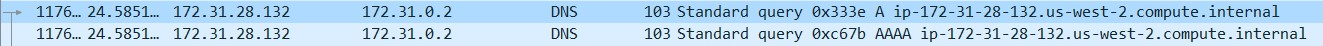
These packets are the victim sending a DNS  request to, most likely, a router.


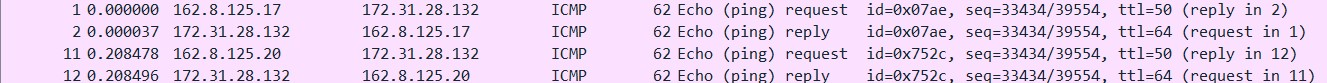

These are packets with Internet Control Message Protocol. Here 2 different ips are pinging victim IP for avaibility and victim IP is pinging reply back
<b>========================================================================================================================</b>

In [28]:
ip_dst=df['ip.dst'].value_counts()
# Showing only the top ones
print("TOP IPS")
ip_dst.head()

TOP IPS


ip.dst
172.31.28.132                  120253
172.31.0.2                        100
92.103.90.30,172.31.28.132         26
122.154.73.42,172.31.28.132        26
61.7.231.225,172.31.28.132         26
Name: count, dtype: int64


### 2.4) What are the characteristics of the attack (aka fingerprint)? 

Firstly, all the attacks are DNS protocol. According to CloudFare this kind of attack is a volumetric distributed denial-of-service (DDoS) attack that uses the capabilities of open DNS resolvers to overload a target server or network with an increased quantity of traffic, leaving the server and its surrounding territory unreachable. We believe the attack here is called DDOS DNS amplification attack. Since there are several source ips targeting victim and since most of them pass argument "ANY", this is the main charasteristics of DNS amplification attack.  

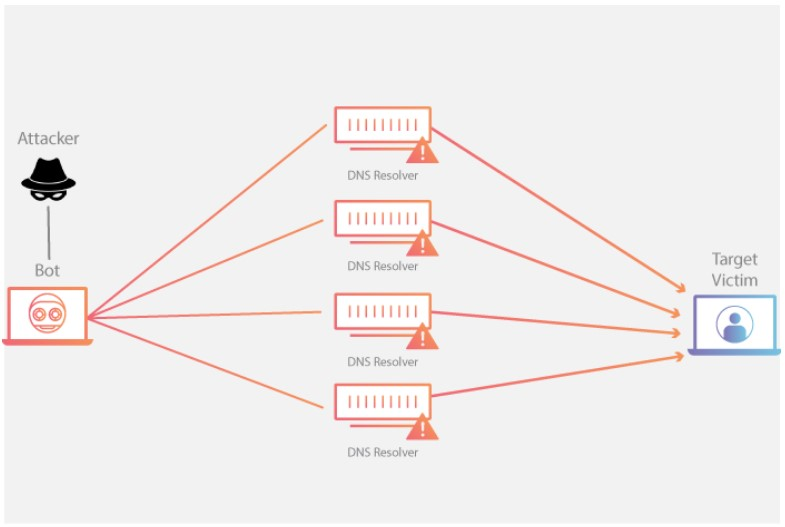

Ref: https://www.cloudflare.com/en-gb/learning/ddos/dns-amplification-ddos-attack/
<b>========================================================================================================================</b>


### 2.5) How a Wireshark filter of the attack looks like?

In order to see only the DDOS attacks we just have to use this filter "ip.dst == 172.31.28.132 && ip.proto == 17 && udp.srcport == 53 && udp.dstport == 80 && !icmp". We disabled icmp because we think it is packets when one of the DNS resolvers were offline and that is why the Attacker was pinging to see for avaibility of that. So we dont think we can really say it was part of the main DDOS attack, that is why we disabled it.
<b>========================================================================================================================</b>

Target:  172.31.28.132


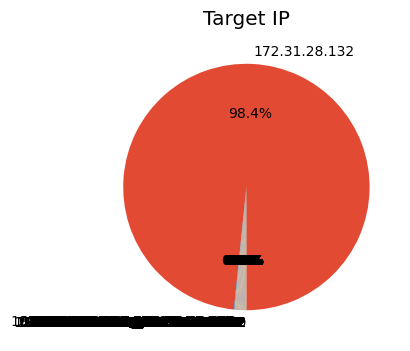

In [29]:
fig = plt.figure(figsize=(4,4))

ax = plt.subplot2grid((1,1), (0,0))
ip_dst.plot(ax=ax,kind='pie', autopct='%1.1f%%', startangle=270, fontsize=10,title="Target IP")
ax.set_ylabel("")

fig.show()

top1_target_ip=ip_dst.index[0]
target_network=top1_target_ip.split('.')[0]+'.'+top1_target_ip.split('.')[1]
ip_proto=df['ip.proto'].value_counts()
top1_target_ip_proto=ip_proto.index[0]
udp_srcip_dstip_top1=df[df['ip.dst']==top1_target_ip]['ip.src'].value_counts()
udp_srcport_top1=df[df['ip.dst']==top1_target_ip]['udp.srcport'].value_counts()
udp_dstport_top1=df[df['ip.dst']==top1_target_ip]['udp.dstport'].value_counts()


occurrence_dnsquery=df['dns.qry.name'].value_counts()
top_dnsquery=occurrence_dnsquery.index[0]


print("Target: ", top1_target_ip)

### Visualizing the distribution of src IPs and the (src and dst) UDP ports

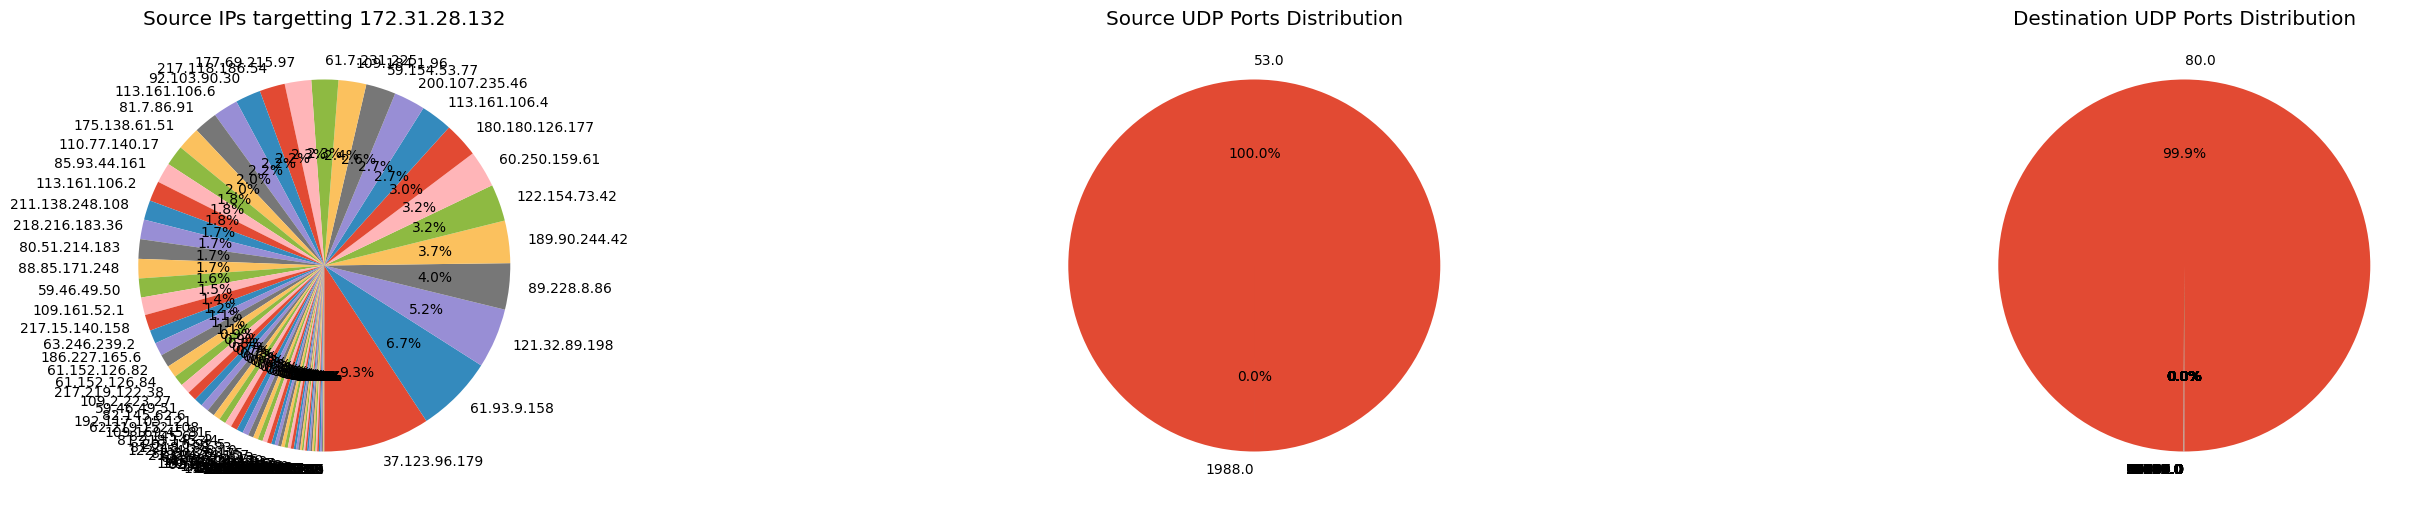

In [30]:
udp_srcip_dstip_top1=df[df['ip.dst']==top1_target_ip]['ip.src'].value_counts()
udp_srcport_top1=df[df['ip.dst']==top1_target_ip]['udp.srcport'].value_counts()
udp_dstport_top1=df[df['ip.dst']==top1_target_ip]['udp.dstport'].value_counts()

fig = plt.figure(figsize=(30,20))
fig.subplots_adjust(wspace=1)

ax = plt.subplot2grid((2,3), (0,0))
udp_srcip_dstip_top1.plot(kind='pie',ax=ax, autopct='%1.1f%%', startangle=270, fontsize=10,title="Source IPs targetting "+top1_target_ip)
ax.set_ylabel("")

ax1 = plt.subplot2grid((2,3), (0,1))
udp_srcport_top1.plot(kind='pie',ax=ax1, autopct='%1.1f%%', startangle=270, fontsize=10,title="Source UDP Ports Distribution")
ax1.set_ylabel("")

ax2 = plt.subplot2grid((2,3), (0,2))
udp_dstport_top1.plot(kind='pie',ax=ax2, autopct='%1.1f%%', startangle=270, fontsize=10,title="Destination UDP Ports Distribution")
ax2.set_ylabel("")

# ax3 = plt.subplot2grid((2,3), (1,0))
# udp_srcip_dstip_top2.plot(kind='pie',ax=ax3, autopct='%1.1f%%', startangle=270, fontsize=10,title="Source IPs targetting "+top2_target_ip)
# ax3.set_ylabel("")

# ax4 = plt.subplot2grid((2,3), (1,1))
# udp_srcport_top2.plot(kind='pie',ax=ax4, autopct='%1.1f%%', startangle=270, fontsize=10,title="Source UDP Ports Distribution")
# ax4.set_ylabel("")

# ax5 = plt.subplot2grid((2,3), (1,2))
# udp_dstport_top2.plot(kind='pie',ax=ax5, autopct='%1.1f%%', startangle=270, fontsize=10,title="Destination UDP Ports Distribution")
# ax5.set_ylabel("")

fig.show()


### 2.6) Which is the target (destination) IP of the attack?

Since 172.31.28.132 was the ip address that was most overloaded with dns packets, it is the target IP.
<b>========================================================================================================================</b>

In [31]:
# From the pie charts above we can see that 99% of the traffic attacks is from port 53 to 80, so it is ONE to ONE attack

# MANUAL SELECTION: Considering the attack from ONE to ONE port!!!
attack_records=df[df['ip.dst']==top1_target_ip]\
                [df['ip.src'].str.contains(target_network)==False]\
                [df['ip.proto']==top1_target_ip_proto]\
                [df['udp.srcport']==udp_srcport_top1.index[0]]\
                [df['udp.dstport']==udp_dstport_top1.index[0]]

# # MANUAL SELECTION: Considering the attack from ONE to MANY ports!!!
# attack_records=df[df['ip.dst']==top1_target_ip]\
#                 [df['ip.src'].str.contains(target_network)==False]\
#                 [df['ip.proto']==top1_target_ip_proto]\
#                 [df['udp.srcport']==udp_srcport_top1.index[0]]\
#                 [df['dns.qry.name'].str.contains(top_dnsquery)==True]
                
# # MANUAL SELECTION: Considering the attack from MANY to ONE port!!!
# attack_records=df[df['ip.dst']==top1_target_ip]\
#                 [df['ip.src'].str.contains(target_network)==False]\
#                 [df['ip.proto']==top1_target_ip_proto]\
#                 [df['udp.dstport']==udp_dstport_top1.index[0]]\
#                 [df['dns.qry.name'].str.contains(top_dnsquery)==True]

# # MANUAL SELECTION: Considering the attack from MANY to MANY portS!!!
# attack_records=df[df['ip.dst']==top1_target_ip]\
#                 [df['ip.src'].str.contains(target_network)==False]\
#                 [df['ip.proto']==top1_target_ip_proto]\
#                 [df['udp.srcport']==udp_srcport_top1.index[0]]\
#                 [df['udp.dstport']==udp_dstport_top1.index[0]]\
#                 [df['dns.qry.name'].str.contains(top_dnsquery)==True]

remaining_records=df[~df.isin(attack_records)]

attack_records

,frame.time_epoch,ip.proto,ip.src,ip.dst,udp.srcport,udp.dstport,tcp.srcport,tcp.dstport,frame.len,dns.qry.type,dns.qry.name,dns.resp.name
46,2014-12-22 15:38:47.712599039,17,89.228.8.86,172.31.28.132,53.0,80.0,NaN,NaN,25848,255.0,nlhosting.nl,"nlhosting.nl,nlhosting.nl,nlhosting.nl,nlhosti..."
48,2014-12-22 15:38:47.713639975,17,89.228.8.86,172.31.28.132,53.0,80.0,NaN,NaN,25848,255.0,nlhosting.nl,"nlhosting.nl,nlhosting.nl,nlhosting.nl,nlhosti..."
50,2014-12-22 15:38:47.716511011,17,89.228.8.86,172.31.28.132,53.0,80.0,NaN,NaN,25848,255.0,nlhosting.nl,"nlhosting.nl,nlhosting.nl,nlhosting.nl,nlhosti..."
52,2014-12-22 15:38:47.718020916,17,89.228.8.86,172.31.28.132,53.0,80.0,NaN,NaN,25848,255.0,nlhosting.nl,"nlhosting.nl,nlhosting.nl,nlhosting.nl,nlhosti..."
54,2014-12-22 15:38:47.723645926,17,89.228.8.86,172.31.28.132,53.0,80.0,NaN,NaN,25848,255.0,nlhosting.nl,"nlhosting.nl,nlhosting.nl,nlhosting.nl,nlhosti..."
...,...,...,...,...,...,...,...,...,...,...,...,...
122228,2014-12-22 15:39:07.868599892,17,122.154.73.42,172.31.28.132,53.0,80.0,NaN,NaN,24424,255.0,nlhosting.nl,"nlhosting.nl,nlhosting.nl,nlhosting.nl,nlhosti..."
122229,2014-12-22 15:39:07.868753910,17,121.32.89.198,172.31.28.132,53.0,80.0,NaN,NaN,19968,255.0,sandia.gov,"sandia.gov,sandia.gov,sandia.gov,sandia.gov,sa..."
122230,2014-12-22 15:39:07.868877888,17,89.228.8.86,172.31.28.132,53.0,80.0,NaN,NaN,1800,255.0,ietf.org,"ietf.org,ietf.org,ietf.org,ietf.org,ietf.org,i..."
122231,2014-12-22 15:39:07.868885040,17,113.161.106.4,172.31.28.132,53.0,80.0,NaN,NaN,5104,255.0,verisign.com,"verisign.com,verisign.com,verisign.com"



### 2.7) How many records are part of the attack?

From the table above we see that 120149 records are part of the attack. If we were to consider icmp is also part of the attacks then the records would have been 122026.
<b>========================================================================================================================</b>

In [39]:
print(attack_records['ip.src'].unique())
len(attack_records['ip.src'].unique())



['89.228.8.86' '70.62.123.36' '82.145.62.6' '82.145.62.5' '37.123.96.179'
 '92.103.90.30' '82.80.26.175' '192.117.105.121' '61.93.9.158'
 '81.5.178.235' '198.101.213.159' '218.216.183.36' '62.219.152.108'
 '109.2.223.27' '81.218.145.44' '61.7.231.225' '122.154.73.42'
 '42.112.208.60' '61.19.78.113' '122.154.238.10' '81.218.188.83'
 '121.32.89.198' '59.154.53.77' '203.174.167.20' '82.145.62.7'
 '82.145.62.3' '211.138.248.108' '110.170.116.9' '81.7.86.91'
 '110.170.116.12' '60.250.159.61' '109.184.1.96' '217.15.140.158'
 '200.107.235.46' '113.161.106.4' '62.219.141.161' '61.152.126.84'
 '202.10.92.5' '180.180.126.177' '109.161.52.1' '217.118.186.54'
 '189.90.244.42' '80.51.214.183' '85.93.44.161' '88.85.171.248'
 '110.159.221.147' '59.46.49.50' '63.246.239.2' '61.152.126.82'
 '113.161.106.6' '46.145.104.93' '195.175.90.210' '110.77.140.17'
 '177.69.215.97' '118.70.197.18' '175.138.61.51' '118.70.197.32'
 '113.161.106.2' '218.94.74.157' '118.70.197.42' '217.219.122.38'
 '59.46.49.51' '174

79


### 2.8) How many unique (source) IP addresses performed the attack?

From the data above it is 79.
<b>========================================================================================================================</b>

In [40]:
top5_srcips_pkts=attack_records['ip.src'].value_counts().head(5).sort_values()
top5_srcips_pkts

ip.src
189.90.244.42     4433
89.228.8.86       4831
121.32.89.198     6261
61.93.9.158       8086
37.123.96.179    11126
Name: count, dtype: int64


### 2.9) Which top 3 source IP addresses sent more packets in the attack?
From the data above and also with the help of the wireshark tool we can confirm that these 3 are the top ips. 

37.123.96.179
61.93.9.158
121.32.89.198         

The 3 top source IP addresses in wireshark can be found at Statistics -> Conversations -> UDP/IPv4 and by sorting on Packets:

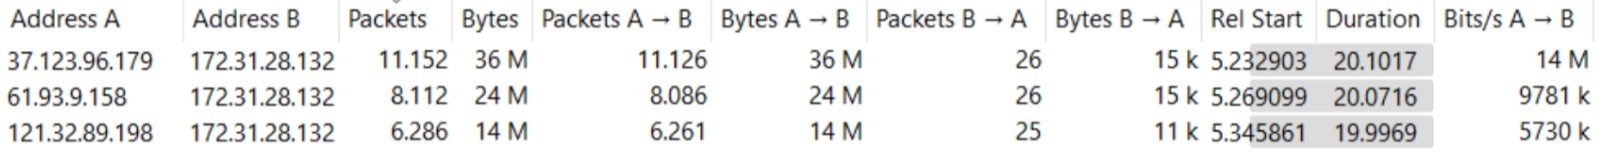
<b>========================================================================================================================</b>


### 2.10) Where are these top 3 source IP geolocated?

With the help of the iplocation(https://www.iplocation.net/ip-lookup) we can see geolocations as below. 

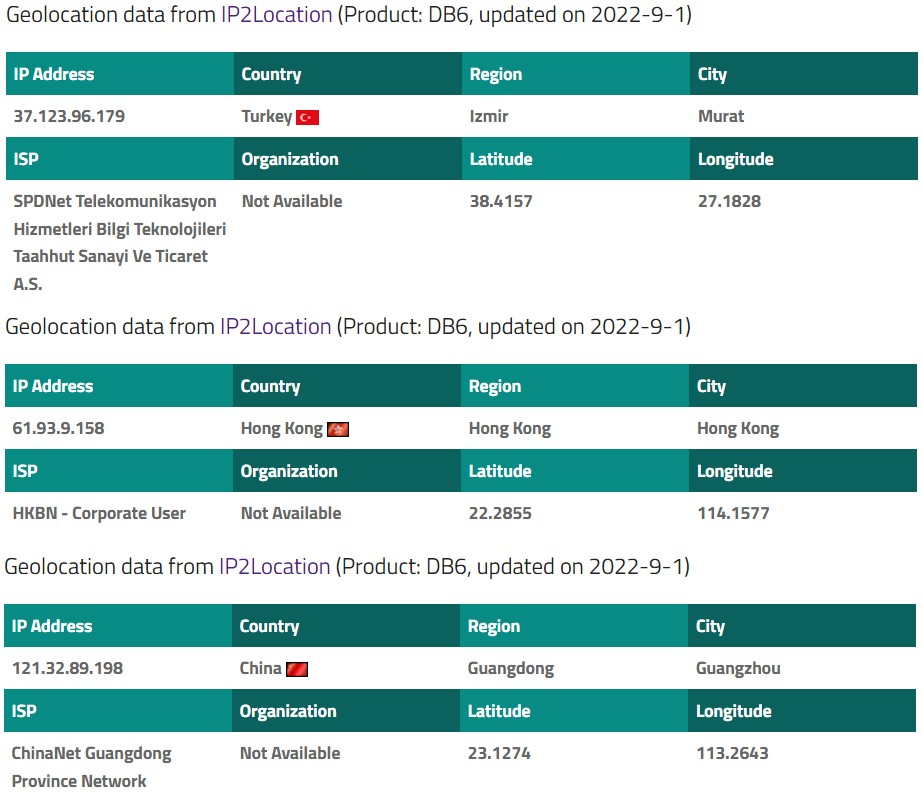

<b>========================================================================================================================</b>


### 2.11) Which Autonomous Systems are related to these top 3 source IP addresses?
Data acquired with the help of https://hackertarget.com/as-ip-lookup/

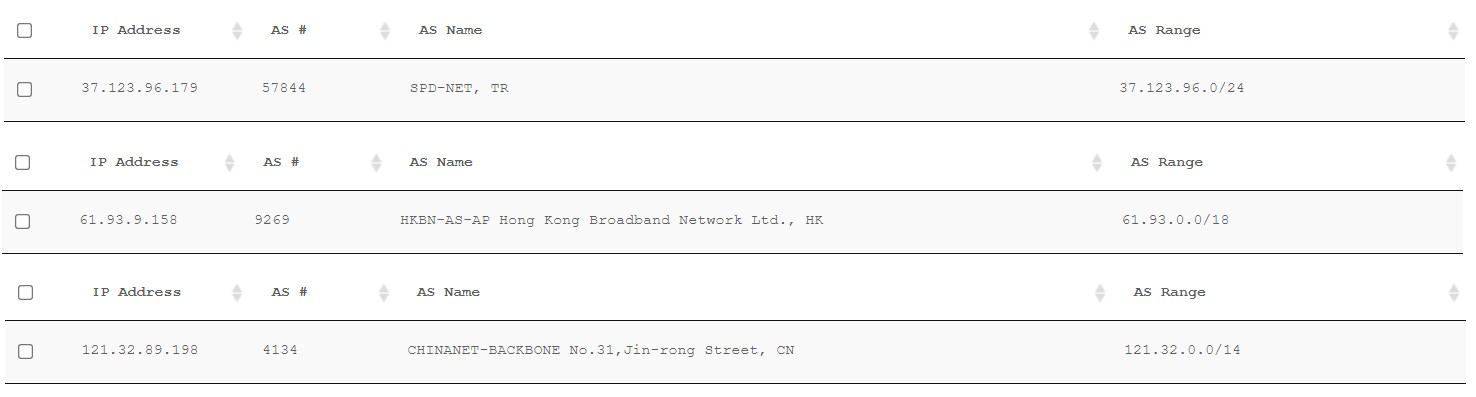

<b>========================================================================================================================</b>


### 2.12) What is the distribution of vendors related to the source IP addresses involved in the attack? 

From the wireshark tools, while in filtered list (ip.dst == 172.31.28.132 && ip.proto == 17 && udp.srcport == 53 && udp.dstport == 80 && !icmp), if we go to Statistics -> Conversations, then we look at ethernet, we can see we have ethernet source address of all records (06:90:f4:0e:e0:ff). However we tried various websites in Google for "mac address for vendor", and entered 06:90:f4:0e:e0:ff in search, Unfortunetaly, no matches were found. We suspect that the mac address could be from the router that is connected to the victim, and that is why we can't find any matches in the internet.

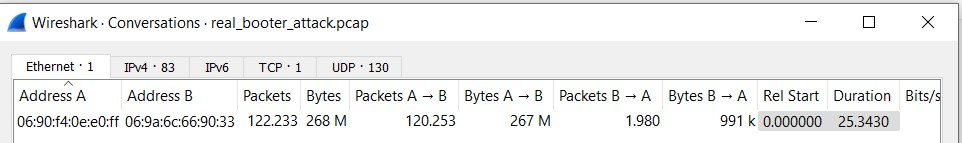
<b>========================================================================================================================</b>

In [34]:
attack_records['udp.srcport'].value_counts()

udp.srcport
53.0    120149
Name: count, dtype: int64


### 2.13) What is/are the source port(s) involved in the attack? 

According to main attack records it is only port 53, but if we look at wireshark there is also one tcp packet which is probably not part of the attack with source port 80 sent to the victim.
<b>========================================================================================================================</b>

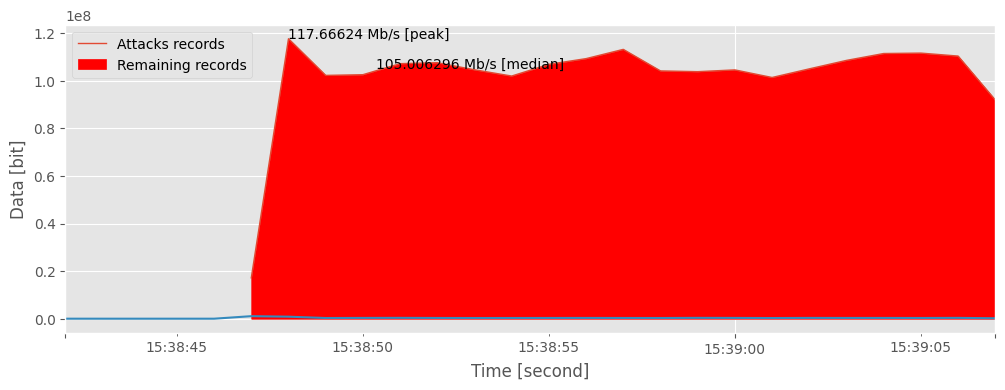

In [35]:
# Generating a time series of the attack and the remaining traffic
overall_bps=df.set_index(['frame.time_epoch']).groupby(pd.Grouper(freq='S')).agg(['sum'])['frame.len']
attack_bps=attack_records.set_index(['frame.time_epoch']).groupby(pd.Grouper(freq='S')).agg(['sum'])['frame.len']
attack_bps_median=attack_bps.median()
attack_bps_peak=max(attack_bps['sum'])

remaining_bps=remaining_records.set_index(['frame.time_epoch']).groupby(pd.Grouper(freq='S')).agg(['sum'])['frame.len']


#visulaization
fig = plt.figure(figsize=(12,4))

ax = plt.subplot2grid((1,1), (0,0))

attack_bps.plot(ax=ax, lw=1)
ax.fill_between(attack_bps.index, 0, attack_bps['sum'],color='r')

ax.annotate(str(attack_bps_peak/10e5)+' Mb/s [peak]', (str(attack_bps[attack_bps['sum'] == attack_bps_peak].index.values[0]), attack_bps_peak),
             xytext=(0, 0), textcoords='offset points')
ax.annotate(str(attack_bps_median[0]/10e5)+' Mb/s [median]', (str(attack_bps.index.values[0]), attack_bps_median),
             xytext=(90, 0), textcoords='offset points')

remaining_bps.plot(ax=ax)

ax.legend(['Attacks records','Remaining records'])
ax.set_ylabel("Data [bit]")
ax.set_xlabel("Time [second]")

fig.show()


### 2.14) How much was the data rate peak of the attack [Mbits/second]?

As you can see from the graph above peak rate of the attack was 117.66624 Mb/s

<b>========================================================================================================================</b>


### 2.15) What is the distribution/frequency of TCP flags involved in the attack?
This is a TCP Packet that closes or ends the connection between the sender and receiver. We can know this as the RST(Reset) Flag has been set.
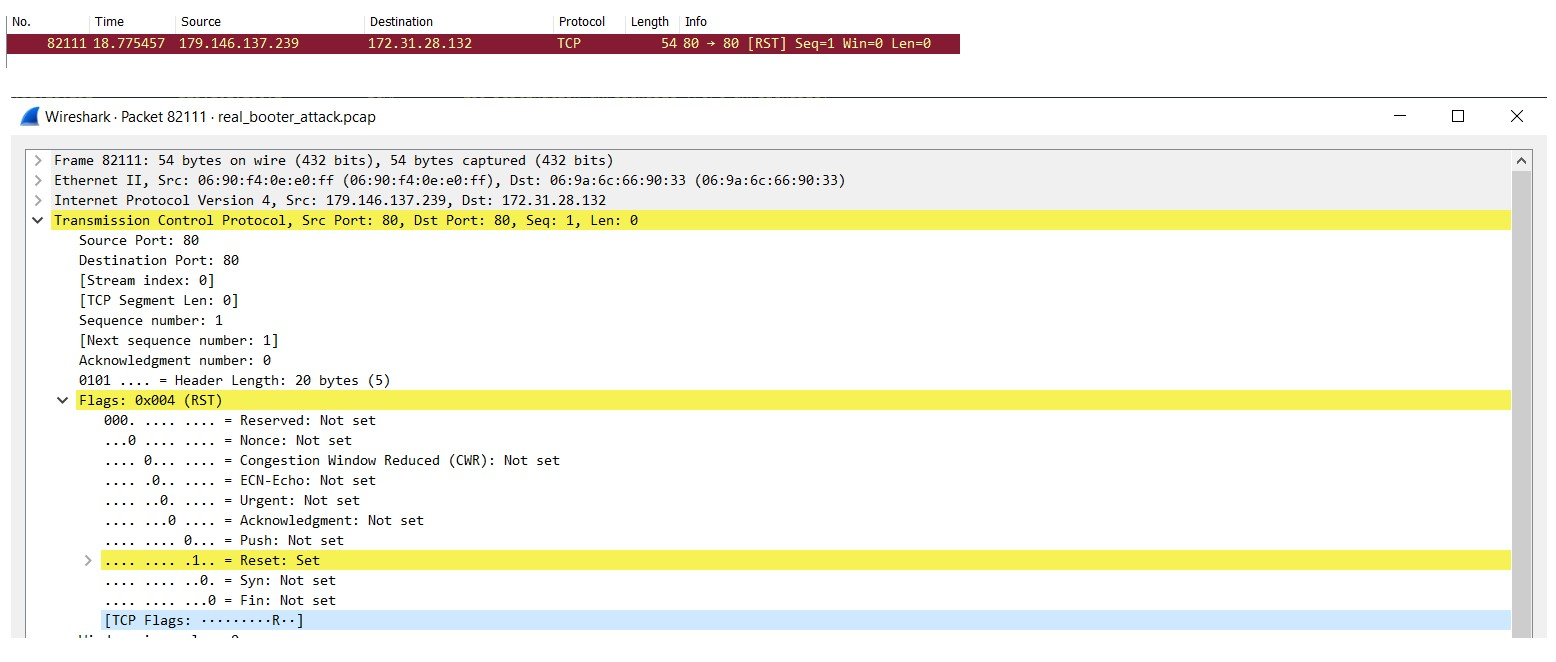
<b>========================================================================================================================</b>


### 2.16) What is the distribution/frequency of packet length ("total length")?

This information can be found at Statistics -> Packet Lengths
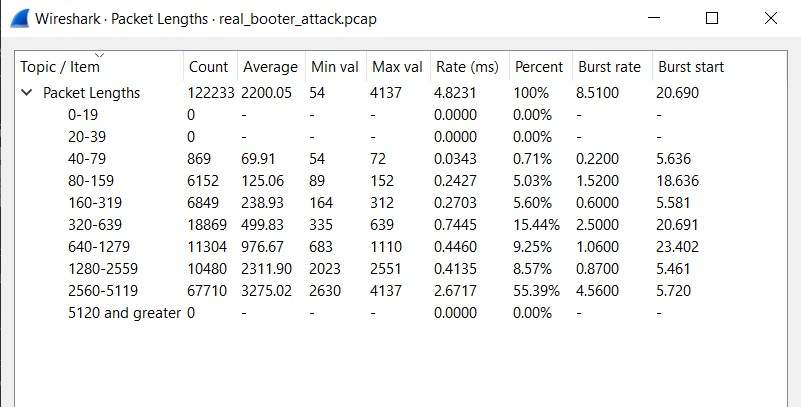



According to google, histogram graphs are best for visualize distributions and frequency, so we decided to also plot a histogram of packet length

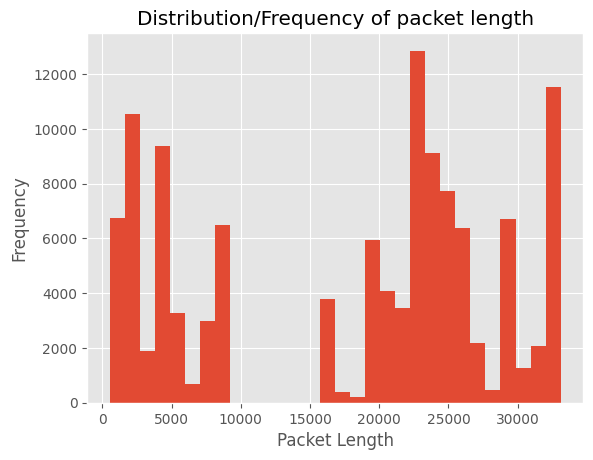

In [36]:
attack_records['frame.len'].plot.hist(bins = 30)
plt.title("Distribution/Frequency of packet length")
plt.xlabel("Packet Length")
plt.show()

## 3) Conclusion and Reflection

Here are some of the key things we have learned while completing the assignment above.

The type of DDoS attack that we have examined from the Wireshark capture is known as DNS flood. It involves flooding the DNS resolver of a domain with large amounts of UDP packets in the hopes of overloading it and making it less responsive/ unresponsive All the packets that are sent as part of the attack are sent from port 53 to port 80 of the receiver. All the packets that are being sent are targeting just a single IP address. This is one of the most common types of DDOS attacks along with other application layer attacks.

The IP address of the servers that are used to send these packets are numerous and are scattered around the world. We can see this as just the top 3 sources of IP addresses of these packets came from Turkey, Hong Kong and China. In total, there were 79 different Ip addresses that were sending packets and these were located all around the world. This is done by the attackers to make it a lot harder to stop/ limit the damage of a DDOS attack. If an attack were only being executed by a few servers, it would be easy to identify and reject packets from these sources but with such a high volume of packets coming from this many different sources, it can become really difficult .

The peak rate needed to successfully carry out a DDOS attack is very high. In the capture that we have sampled, it is 117 Mb/s.  This itself is insane amounts of data being sent over the internet and while it is large, by today's standards it does lag behind a bit. In Q3 of 2021, the peak rate of the average DDOS attack was approximately 4.31 Gb/s.



Reference: 20+ DDoS attack statistics and facts for 2018-2022 https://www.comparitech.com/blog/information-security/ddos-statistics-facts 

Reference for the codes: https://github.com/jjsantanna/pcap_dns_ddos_analysis

